# **Factors that Impact Fertility Rates**

## **Contents**
1. **Introduction**
2. **Data Sources**
    - Fertility-Rate.csv
    - Female-Workforce.csv
    - Female-Education.csv
3. **Initiation and Data Preparation**
    - Importing
    - Defining Country Selections
    - Data Cleanup
4. **Questions**
    - **Q1.** How do Region or Income Affect Fertility Rates?
    - **Q2.** Do Fertility Rates Decrease with Higher Female Labour Participation?
    - **Q3.** Do Fertility Rates Decrease with Higher Female Labour Participation in Specific Regions or Periods of Time?
    - **Q4.** Which Countries had the Lowest and Highest Fertility Rates in 1960 and 2020?
    - **Q5.** How do the Fertility Rates in Different Countries Change Between 1960 and 2020?
    - **Q6.** Does Increased Female Secondary Education Decrease Fertility Rates?
5. **Conclusion and Recommendations**
6. **References**

## **1. Introduction**
Fertility rates have been falling worldwide over the last century (Vollset, 2020) with the expectation for continued decline. Many countries currently hold fertility rates far below replacement levels leading to economic and societal impacts. 

These include an increasingly large elderly population relying on benefits from an ever shrinking labour tax pool - as is the case in Japan (Shrinkonomics: Lessons from Japan, 2020).
Some governments have attempted to remedy these outcomes through increased immigration whilst others look to financial incentives.

Conversely, a country with a high fertility rate requires the resources and stability to accomodate a growing population. Countries in this category have a bottom-heavy population pyramid with many young dependents.

Understanding the way in which fertility has shifted over time in different regions allow us to piece together factors that influence the fertility of past populations and speculate on the future.

## **2. Data Sources**
The three data files used in this notebook all originate from the [World Bank](https://data.worldbank.org/). These files were chosen as the data in each start from as far back as 1960 and run all the way to 2020. Similar data files on [Kaggle](https://www.kaggle.com/) did not hold data that was as recent or comprehensive.

All three files hold the 'Country Code' and 'Country Name' key data columns that allowed them to be linked.

### **Fertility-Rate.csv**
Data file obtained from [World Bank](https://data.worldbank.org/indicator/SP.DYN.TFRT.IN) (Fertility rate, total (births per woman) | Data, 2022). Important columns include:
- Country Name
- Country Code
- Years (columns 1960-2020) that hold ferility rates per country

### **Female-Workforce.csv**
Data file obtained from [World Bank](https://data.worldbank.org/indicator/SL.TLF.CACT.FE.ZS) (Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate) | Data, 2022). Important columns include:
- Country Name
- Country Code
- Years (columns 1960-2020) that hold the percentage of female population ages 15+ who are employed

### **Female-Education.csv**
Data file obtained from [World Bank](https://data.worldbank.org/indicator/SE.SEC.ENRR.FE) (School enrollment, secondary, female (% gross) | Data, 2021). 

Note that gross enrollment ratio is calculated by looking at the number of students enrolled (regardless of age) compared to the age group that is expected to be attending secondary school. A value that is high or over 100% may represent students who are repeating years or completing at an older age. (Indexmundi.com, 2019) 

Important columns include:
- Country Name
- Country Code
- Years (columns 1960-2020) that hold the gross percentage of females enrolled in secondary education

## **Initiation and Data Preparation**
### **Importing**

In [1]:
# Start by importing required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import where
import geopandas
import geoplot

/usr/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Read in the data:

In [2]:
# Import the data
# The csv files had multiple unnecessary rows to skip
fertility_df = pd.read_csv('Fertility-Rate.csv', skiprows=4)
female_labour_df = pd.read_csv('Female-Workforce.csv', skiprows=4)
female_school_df = pd.read_csv('Female-Education.csv', skiprows=4)

# See the contents of the fertility_df dataframe:
fertility_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,1.795000,1.813000,1.834000,1.854000,1.872000,1.886000,1.896000,1.901000,1.901000,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.723308,6.738651,6.752818,6.765400,6.775406,6.783357,...,4.882058,4.804516,4.726220,4.647637,4.569675,4.493744,4.420264,4.349433,4.281716,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,...,5.562000,5.359000,5.163000,4.976000,4.800000,4.633000,4.473000,4.321000,4.176000,NaN
3,Africa Western and Central,AFW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.439002,6.455523,6.471399,6.487246,6.502619,6.519050,...,5.503781,5.446144,5.384336,5.319473,5.251674,5.182391,5.113003,5.044144,4.976546,NaN
4,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,6.039000,5.953000,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.200000,2.160000,2.130000,2.090000,2.060000,2.020000,2.000000,1.970000,NaN,NaN
262,"Yemen, Rep.",YEM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.938000,7.962000,7.991000,8.026000,8.067000,8.114000,...,4.439000,4.326000,4.214000,4.103000,3.994000,3.890000,3.792000,3.700000,3.614000,NaN
263,South Africa,ZAF,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.041000,6.028000,6.010000,5.986000,5.956000,5.920000,...,2.561000,2.537000,2.511000,2.484000,2.457000,2.430000,2.405000,2.381000,2.358000,NaN
264,Zambia,ZMB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.115000,7.169000,7.214000,7.249000,7.274000,7.291000,...,5.233000,5.132000,5.026000,4.918000,4.814000,4.718000,4.633000,4.559000,4.496000,NaN


### **Defining Country Selections**
The data imported contains rows for every country as well as continental regions, income brackets and other country groupings. It is important to define these groups so that they can easily be filtered for use or to be removed. 

In [3]:
# Selection list that represent countries in each of these income brackets
wealth_list = ['High income', 'Upper middle income', 'Middle income', 'Lower middle income', 
'Low income']

# Selection list that represent countries in these regions
region_list = ['Africa Eastern and Southern', 'Africa Western and Central',
'Central Europe and the Baltics', 'East Asia & Pacific', 'Europe & Central Asia', 
'Latin America & Caribbean', 'Middle East & North Africa', 'North America', 'South Asia', 
'Sub-Saharan Africa']

# Selection list that represent other groupings of countries that are not needed
other_groupings_list = ['Arab World', 'Early-demographic dividend', 'East Asia & Pacific (IDA & IBRD)',
'Euro area', 'Europe & Central Asia (IDA & IBRD)', 'European Union', 'Fragile and conflict affected situations',
'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA & IBRD total',
'IDA blend', 'IDA only', 'IDA total', 'Latin America & Caribbean (IDA & IBRD)',
'Middle East & North Africa (IDA & IBRD)', 'Pacific island small states', 'Post-demographic dividend',
'Pre-demographic dividend', 'Small states', 'South Asia (IDA & IBRD)', 'Sub-Saharan Africa (IDA & IBRD)',
'World', 'Caribbean small states', 'East Asia & Pacific (excluding high income)',
'Europe & Central Asia (excluding high income)', 'Latin America & Caribbean (excluding high income)',
'Least developed countries: UN classification', 'Low & middle income', 'Late-demographic dividend',
'Middle East & North Africa (excluding high income)', 'OECD members', 'Other small states',
'Sub-Saharan Africa (excluding high income)']

### **Data Cleanup**

**File 1 - Fertility Data**

Clean up the **fertility_df** dataframe by removing unnecessary data columns, including the last 'Unnamed' column that was added when the csv was added.

In [4]:
# Remove columns that are not required
fertility_df = fertility_df.drop(
    ['Indicator Name', 'Indicator Code'],
    axis=1 
)
fertility_df = fertility_df.loc[:, ~fertility_df.columns.str.contains('^Unnamed')]

# Removing rows for country groupings that will not be used
fertility_df = fertility_df[~fertility_df['Country Name'].isin(other_groupings_list)]

# See the new contents of the female_labour_df dataframe:
fertility_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.417000,...,1.779000,1.795000,1.813000,1.834000,1.854000,1.872000,1.886000,1.896000,1.901000,1.901000
1,Africa Eastern and Southern,AFE,6.723308,6.738651,6.752818,6.765400,6.775406,6.783357,6.789885,6.796040,...,4.956842,4.882058,4.804516,4.726220,4.647637,4.569675,4.493744,4.420264,4.349433,4.281716
2,Afghanistan,AFG,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,...,5.770000,5.562000,5.359000,5.163000,4.976000,4.800000,4.633000,4.473000,4.321000,4.176000
3,Africa Western and Central,AFW,6.439002,6.455523,6.471399,6.487246,6.502619,6.519050,6.537615,6.560078,...,5.557872,5.503781,5.446144,5.384336,5.319473,5.251674,5.182391,5.113003,5.044144,4.976546
4,Angola,AGO,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,7.194000,7.267000,...,6.120000,6.039000,5.953000,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000


**File 2 - Female Labour Rate Data**

The **female_labour_df** dataframe does not contain values for the years up until 1990. These blank fields exist in the original csv file. We will remove these columns to allow future data manipulations simpler. This dataframe also has unused columns that can be removed.

In [5]:
# Remove columns that do not hold values (years 1960-1989)
female_labour_df = female_labour_df.dropna(axis=1, how='all') 

# Remove columns that are not required
female_labour_df = female_labour_df.drop(
    ['Indicator Name', 'Indicator Code'],
    axis=1 
)
female_labour_df = female_labour_df.loc[:, ~female_labour_df.columns.str.contains('^Unnamed')]

# Removing rows for country groupings that will not be used
fertility_df = fertility_df[~fertility_df['Country Name'].isin(other_groupings_list)]

# See the new contents of the female_labour_df dataframe:
female_labour_df.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,64.888276,64.922012,64.988104,65.071321,65.170735,65.405947,65.610593,65.766867,...,65.762931,65.570922,65.654496,65.643865,65.831169,65.917046,66.125922,66.230084,66.362142,64.111891
2,Afghanistan,AFG,15.180000,15.214000,15.223000,15.197000,15.178000,15.221000,15.078000,14.954000,...,15.454000,15.879000,16.794001,17.749001,18.746000,19.798000,20.886999,21.228001,21.566000,16.188999
3,Africa Western and Central,AFW,60.038278,60.025550,59.958083,59.926100,59.894997,59.875419,59.814718,59.771204,...,58.037689,56.707668,55.370493,54.999809,54.805393,54.548806,54.295500,54.118607,53.977916,52.764629
4,Angola,AGO,75.407997,75.380997,75.369003,75.371002,75.387001,75.416000,75.414001,75.428001,...,74.847000,74.834000,74.833000,74.843002,74.863998,74.882004,74.912003,74.955002,75.011002,73.617996


**File 3 - Female Secondary Schooling Rate Data**

The **female_school_df** has missing data for some countries and years. As the coverage is spotty, we will remove any years that lack data (1960-1969).

In [6]:
# Remove columns that do not hold values (years 1960-1969)
female_school_df = female_school_df.dropna(axis=1, how='all') 

# Remove columns that are not required
female_school_df = female_school_df.drop(
    ['Indicator Name', 'Indicator Code'],
    axis=1 
)
female_school_df = female_school_df.loc[:, ~female_school_df.columns.str.contains('^Unnamed')]

# Removing rows for country groupings that will not be used
female_school_df = female_school_df[~female_school_df['Country Name'].isin(other_groupings_list)]

# See the new contents of the female_school_df dataframe:
female_school_df.head()

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.731331,112.145752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2.22176,2.34345,2.37588,2.64944,2.62517,2.77597,3.19226,3.81069,...,36.635960,38.107941,37.848492,37.332989,36.75185,37.302528,38.602539,39.998402,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,NaN,5.10292,5.70466,NaN,NaN,NaN,NaN,NaN,...,20.720699,NaN,NaN,NaN,NaN,39.741829,NaN,NaN,NaN,NaN


## **Questions**
### **Q1. How do Region or Income Affect Fertility Rates?**

In [7]:
# Remove column that will not be used
fertility_q1_df = fertility_df.drop('Country Code', axis=1)

# Rearrange the dataframe in a form ready for a line plot
fertility_q1_df = fertility_q1_df.set_index('Country Name')
fertility_t_df = fertility_q1_df.T
fertility_t_df.head()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,...,British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,4.820,6.723308,7.45,6.439002,6.708,6.489,NaN,6.929,3.109,4.786,...,NaN,5.615,6.348,7.197,7.651,NaN,7.938,6.041,7.115,7.158
1961,4.655,6.738651,7.45,6.455523,6.790,6.401,NaN,6.910,3.100,4.670,...,NaN,5.651,6.392,7.120,7.645,NaN,7.962,6.028,7.169,7.215
1962,4.471,6.752818,7.45,6.471399,6.872,6.282,NaN,6.892,3.090,4.521,...,NaN,5.679,6.425,7.033,7.630,NaN,7.991,6.010,7.214,7.267
1963,4.271,6.765400,7.45,6.487246,6.954,6.133,NaN,6.875,3.079,4.345,...,NaN,5.696,6.448,6.938,7.604,NaN,8.026,5.986,7.249,7.311
1964,4.059,6.775406,7.45,6.502619,7.036,5.960,NaN,6.857,3.068,4.150,...,NaN,5.698,6.464,6.836,7.567,NaN,8.067,5.956,7.274,7.347


The dataset already contains categories for both region and income brackets among the country names which is convenient for this analysis. 

<AxesSubplot:title={'center':'Fertility Rate based on World Region'}, xlabel='Fertility Rate', ylabel='Year'>

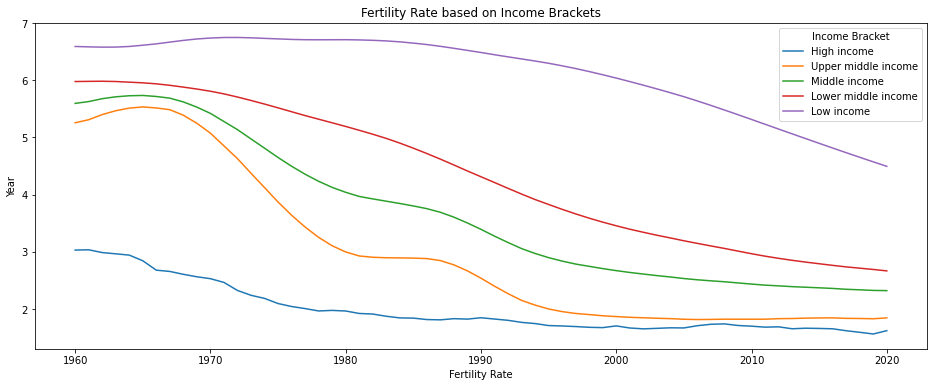

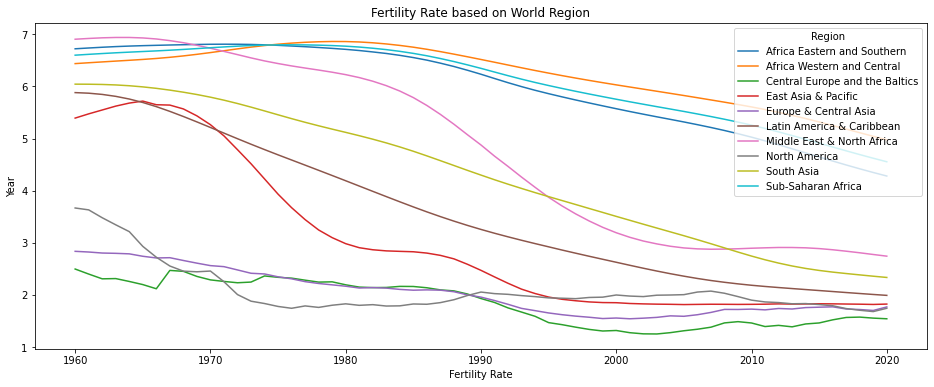

In [8]:
# Obtain country groupings by income bracket only
fertility_by_wealth = fertility_t_df[wealth_list]
fertility_by_wealth.rename_axis('Income Bracket', axis='columns', inplace=True)
fertility_by_wealth.plot(
    kind='line',
    figsize = [16, 6],
    title = 'Fertility Rate based on Income Brackets',
    xlabel = 'Fertility Rate',
    ylabel = 'Year',
)

# Obtain country groupings by region only
fertility_by_region = fertility_t_df[region_list]
fertility_by_region.rename_axis('Region', axis='columns', inplace=True)
fertility_by_region.plot(
    kind='line',
    figsize = [16, 6],
    title = 'Fertility Rate based on World Region',
    xlabel = 'Fertility Rate',
    ylabel = 'Year'
)

**Income Brackets v Fertility**

The resulting graph clearly displays that the level of income causes great disparity in fertility rates. Notably, the lower the income, the higher the fertility. Interestingly the differences between these groups worldwide has greatly decreased as we approach the current year.

**World Region v Fertility**

All regions of the world have seen a decrease in fertility rate over the last 60 years. The Asian regions in particular have seen a dramatic reduction from their high rates in the 1960's whilst European and North American regions started fairly low and fell a smaller amount in comparison. The African regions have seen a steady fall since the 1980's although still retain fairly high levels of fertility.

### **Q2. Do Fertility Rates Decrease with Higher Female Labour Participation?**

To answer this question, we will display every Fertility Rate/Female Labour Rate combination on a hexbin, for every country and year.

In [9]:
# Create new rows by combining all of the years under a new 'Fertility' column
fertility_melt_df = pd.melt(fertility_df, id_vars=['Country Name', 'Country Code'], value_name='Fertility Rate')
labour_melt_df = pd.melt(female_labour_df, id_vars=["Country Name", 'Country Code'], value_name='Female Labour')

# All of the years have been placed in a new column 'variable' which we will rename
fertility_melt_df.rename(columns = {'variable': 'Year'}, inplace=True)
labour_melt_df.rename(columns = {'variable': 'Year'}, inplace=True)

# The country code is dropped for merge
fertility_q2_df = fertility_melt_df.drop('Country Code', axis=1)
labour_q2_df = labour_melt_df.drop('Country Code', axis=1)

# Combine these two dataframes on the Country Name and Year
labour_fertility_df = pd.merge(fertility_q2_df, labour_q2_df, on=['Country Name', 'Year'])

# Remove rows for regions or income brackets so that only Countries remain
removal_list = wealth_list + region_list
lab_fert_country_df = labour_fertility_df[~labour_fertility_df['Country Name'].isin(removal_list)]

# Remove any countries that are missing Fertility Rate or Female Labour Rate
lab_fert_country_df = lab_fert_country_df.dropna(subset=['Fertility Rate', 'Female Labour'])

# Reset the indexes to reflect new number of rows
lab_fert_country_df.reset_index(drop=True, inplace=True)

lab_fert_country_df

,Country Name,Year,Fertility Rate,Female Labour
0,Afghanistan,1990,7.466,15.180000
1,Angola,1990,7.272,75.407997
2,Albania,1990,2.978,51.363998
3,United Arab Emirates,1990,4.454,29.083000
4,Argentina,1990,2.997,45.041000
...,...,...,...,...
5940,Samoa,2020,3.785,30.775000
5941,"Yemen, Rep.",2020,3.614,6.081000
5942,South Africa,2020,2.358,44.043999
5943,Zambia,2020,4.496,69.240997


As this dataframe contains a large number of entries, we will use a hexbin to plot them all and determine if there are any trends.

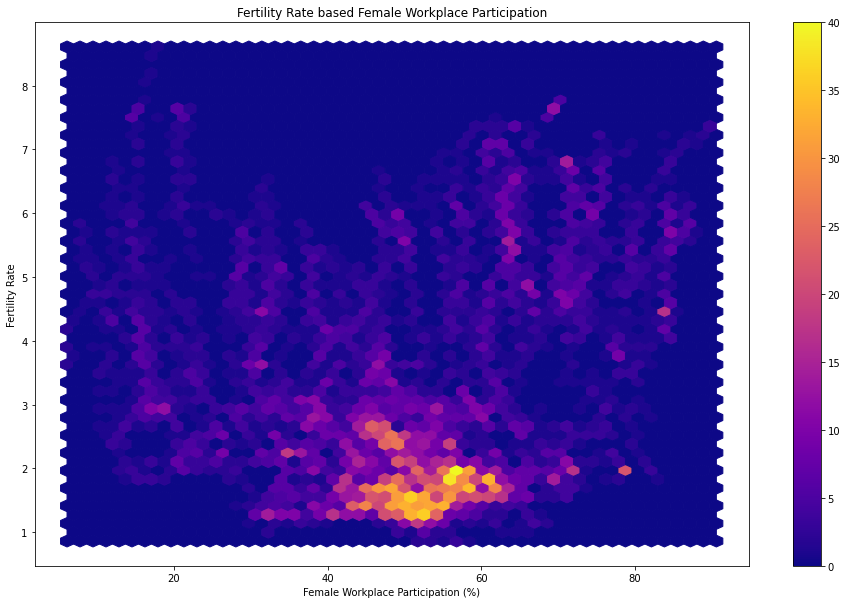

In [10]:
axes = lab_fert_country_df.plot(
    kind = 'hexbin',
    gridsize = 50,
    x = 'Female Labour',
    y = 'Fertility Rate',
    figsize = [16, 10],
    title = 'Fertility Rate based Female Workplace Participation',
    ylabel = 'Fertility Rate',
    xlabel = 'Female Workplace Participation (%)',
    sharex = False,
    cmap="plasma"
)

There are a large number of countries with female labour participation rates clustered around 50% with low fertility rates. However there **does not** appear to be a strong trend that supports that idea that **"Fertility Rates Decrease with Higher Female Labour Participation"**.

### **Q3. Do Fertility Rates Decrease with Higher Female Labour Participation in Specific Regions or Periods of Time?**

This question provides an extension on the previous. In this we will attempt to see if trends over time in continental regions provide any insight on whether a relation between fertility rates and female labour participation exists.

In [11]:
# Regions will be used instead of countries
labour_fertility_region_df = labour_fertility_df.rename(columns = {'Country Name': 'Region'})

# Filter out anything that is not a continental region
labour_fertility_region_df = labour_fertility_region_df.loc[labour_fertility_region_df['Region'].isin(region_list)]

# Reset the indexes to reflect new number of rows
labour_fertility_region_df.reset_index(drop=True, inplace=True)

labour_fertility_region_df

,Region,Year,Fertility Rate,Female Labour
0,Africa Eastern and Southern,1990,6.234901,64.888276
1,Africa Western and Central,1990,6.518146,60.038278
2,Central Europe and the Baltics,1990,1.931082,54.232270
3,East Asia & Pacific,1990,2.471930,66.355622
4,Europe & Central Asia,1990,1.957932,48.967629
...,...,...,...,...
305,Latin America & Caribbean,2020,1.991649,46.094789
306,Middle East & North Africa,2020,2.744110,18.491048
307,North America,2020,1.743927,55.826977
308,South Asia,2020,2.335386,21.437748


Let us present this data on a scatter plot where we show the differences between regions.

Text(0.4, 1, 'Fertility Rate v Female Workplace Participation by Region/Year')

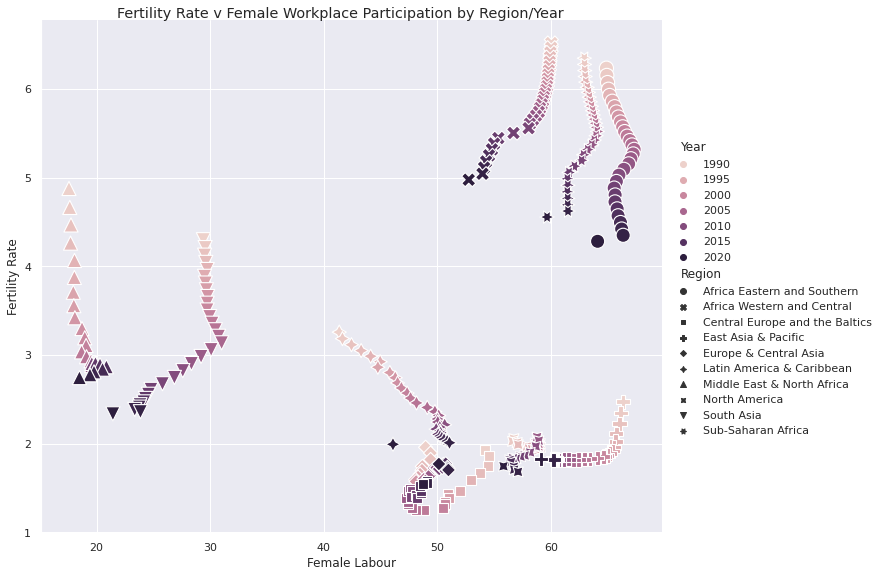

In [12]:
# Convert Year column to numeric to display better in the plot
labour_fertility_region_df['Year'] = pd.to_numeric(labour_fertility_region_df['Year'])

# Apply the default seaborn style
sns.set()

# Use a Seaborn scatter plot with a gradient of colours for Year and different shapes for Region
rel = sns.relplot(
    data = labour_fertility_region_df,
    kind = 'scatter',
    x = 'Female Labour',
    y = 'Fertility Rate',
    hue = 'Year',
    style = 'Region',
    s = 200,
    height = 8, 
    aspect = 1.2
)

rel.fig.suptitle('Fertility Rate v Female Workplace Participation by Region/Year', x=0.4, y=1)

The above plot shows a lot of different pieces of information. It compares the fertility rate against female workplace participation while representing the different world regions with symbols and the year with a particular hue. 

Whilst most regions had a slight decrease or stable female labour participation as fetility fell, **Latin America** bucked this trend by steadily increasing female labour as the fertility rate decreased.

The **African** regions interestingly had the highest female workplace participation which only decreased mildly as fertility rates fell.

The **Middle East and South Africa** as well as **South Asia** regions hold consistently low female labour participation as fertility fell - with **South Asia** in particular decreasing in female labour dramatically from the mid-2000's.

This data overall **does not** provide evidence that **"Fertility Rates Decrease with Higher Female Labour Participation in Specific Regions or Periods of Time".**

However an interesting outcome from this chart is the significant dip in labour rates in 2020 that was experienced by all regions. This was likely caused by the global pandemic causing many to lose jobs.

### **Q4. Which Countries had the Lowest and Highest Fertility Rates in 1960 and 2020?**
The top and bottom 5 countries for fertility rate will be displayed in bar chart form to address this.
In the process of answering this question, we will also create a dataframe with columns for fertility rate in these years for use in question 5.


In [13]:
# Get the fertility rates per country for 1960 and 2020
fertility_1960_df = fertility_melt_df[fertility_melt_df['Year']=='1960']
fertility_2020_df = fertility_melt_df[fertility_melt_df['Year']=='2020']

# Year column no longer needed
fertility_1960_df = fertility_1960_df.drop('Year', axis=1)
fertility_2020_df = fertility_2020_df.drop('Year', axis=1)

# Create new dataframe with columns for fertility in 1960 and 2020
fertility_1960_2020_df = pd.merge(
    fertility_1960_df,
    fertility_2020_df[['Country Code', 'Fertility Rate']],
    on='Country Code', how='left'
)

# Rename fertility columns with designated years
fertility_1960_2020_df = fertility_1960_2020_df.rename(
    columns = {
        'Fertility Rate_x': 'Fertility Rate 1960', 
        'Fertility Rate_y': 'Fertility Rate 2020'
        }
)

# Remove countries that do not have fertility values in 1960 or 2020
fertility_1960_2020_df = fertility_1960_2020_df.dropna(subset=['Fertility Rate 1960', 'Fertility Rate 2020'])

# Get the highest and lowest fertility rate countries in 1960
sorted_1960 = fertility_1960_2020_df.sort_values(
    by = 'Fertility Rate 1960',
    ascending = False,
)
extremes_1960 = pd.concat([sorted_1960.head(), sorted_1960.tail()])

# Get the highest and lowest fertility rate countries in 2020
sorted_2020 = fertility_1960_2020_df.sort_values(
    by = 'Fertility Rate 2020',
    ascending = False,
)
extremes_2020 = pd.concat([sorted_2020.head(), sorted_2020.tail()])

# Set the row index to be the Country Name
extremes_1960 = extremes_1960.set_index('Country Name')
extremes_2020 = extremes_2020.set_index('Country Name')

display('Highest and Lowest Fertility Rates 1960')
display(extremes_1960)
display('Highest and Lowest Fertility Rates 2020')
display(extremes_2020)

'Highest and Lowest Fertility Rates 1960'

,Country Code,Fertility Rate 1960,Fertility Rate 2020
Country Name,,,
Rwanda,RWA,8.187,3.926
Kenya,KEN,7.946,3.365
"Yemen, Rep.",YEM,7.938,3.614
Cote d'Ivoire,CIV,7.691,4.536
Jordan,JOR,7.687,2.639
Czech Republic,CZE,2.090,1.671
Hungary,HUN,2.020,1.524
Japan,JPN,2.001,1.363
Estonia,EST,1.980,1.608


'Highest and Lowest Fertility Rates 2020'

,Country Code,Fertility Rate 1960,Fertility Rate 2020
Country Name,,,
Niger,NER,7.454,6.735
Somalia,SOM,7.250,5.885
"Congo, Dem. Rep.",COD,6.001,5.718
Mali,MLI,6.967,5.693
Chad,TCD,6.250,5.553
"Macao SAR, China",MAC,4.772,1.244
Bosnia and Herzegovina,BIH,3.801,1.243
Singapore,SGP,5.760,1.223
Puerto Rico,PRI,4.657,1.177


Above are two dataframes for the extremes in birth rates in both 1960 and 2020. 

Interestingly, there is not a single country that exists on both charts. Let's plot these dataframes on two separate bar plots:

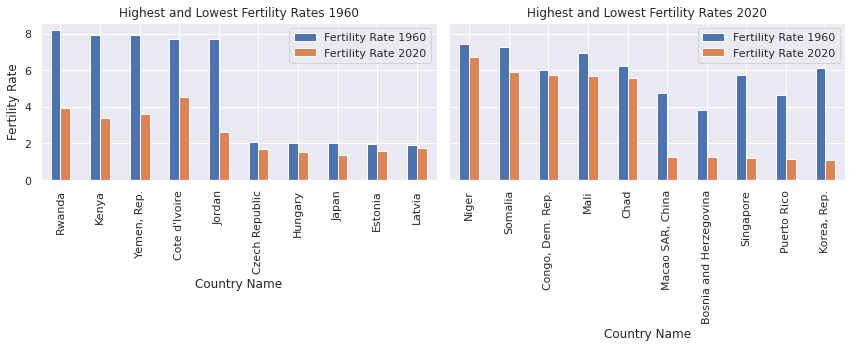

In [14]:
# Remove columns not wanted for the bar chart
extremes_1960 = extremes_1960.drop('Country Code', axis=1)
extremes_2020 = extremes_2020.drop('Country Code', axis=1)

# Plot both years side by side sharing the same y axis
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5), sharey=True)
extremes_1960.plot(
    title='Highest and Lowest Fertility Rates 1960',
    kind='bar',
    ylabel = 'Fertility Rate',
    ax=ax1
)
extremes_2020.plot(
    title='Highest and Lowest Fertility Rates 2020', 
    kind='bar', 
    ax=ax2
)
plt.tight_layout()

The countries with the highest fertility rate in 1960 were all North African and Middle Eastern countries whilst the lowest were from Eastern Europe and Japan.

The countries with the highest ferility rates in 2020 are still majorly African whilst the lowest come from a mix of regions. Included in the lowest are quite a few east and south-east asian countries with a previously high fertility rate in 1960.

These plots show us the countries that had the **"Lowest and Highest Fertility Rates in 1960 and 2020"**

### **Q5. How do the Fertility Rates in Different Countries Change Between 1960 and 2020?**
This question is aimed at addressing how much countries have shifted their fertility rates over time. Which countries have dramatically decreased conception whilst which have maintained or increased?

We will utilise maps from geopandas for visualise this information.

In [15]:
# Create new column that holds the change in fertility rate between 1960 and 2020
fertility_1960_2020_df['Fertility Change'] = fertility_1960_2020_df['Fertility Rate 2020'] - fertility_1960_2020_df['Fertility Rate 1960']

# Drop Fertility Rate columns no longer needed
fertility_1960_2020_df = fertility_1960_2020_df.drop(['Fertility Rate 1960', 'Fertility Rate 2020'], axis=1)

# Get world map through geopandas
map_df = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
map_df.rename({'iso_a3': 'Country Code'}, axis=1, inplace=True)
# Fix some incorrect country codes
map_df['Country Code'] = where(map_df['name']=='France', 'FRA', map_df['Country Code'])
map_df['Country Code'] = where(map_df['name']=='Norway', 'NOR', map_df['Country Code'])

# Merge with our data to get matches that have a fertility entry 
fertility_map_1960_2020_df = map_df.merge(fertility_1960_2020_df, on=['Country Code'], how='left')

# Sort to bring the countries with the lowest fertility drop to the top
fertility_map_1960_2020_df = fertility_map_1960_2020_df.sort_values(
    by = 'Fertility Change',
    ascending = False,
)

fertility_map_1960_2020_df.head()

,pop_est,continent,name,Country Code,gdp_md_est,geometry,Country Name,Fertility Change
119,1944643,Europe,Latvia,LVA,50650.0,"POLYGON ((27.28818 57.47453, 27.77002 57.24426...",Latvia,-0.197
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...","Congo, Dem. Rep.",-0.283
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",Sweden,-0.327
120,1251581,Europe,Estonia,EST,38700.0,"POLYGON ((27.98113 59.47537, 27.98112 59.47537...",Estonia,-0.372
153,10674723,Europe,Czechia,CZE,350900.0,"POLYGON ((15.01700 51.10667, 15.49097 50.78473...",Czech Republic,-0.419


Most of the information in this dataframe is related to the world map although the last column 'Fertility Change' is what we will use to colour the countries.

Despite sorting the dataframe by 'Fertility Change' to bring the countries with the lowest fertility drop to the top, you will notice that not a single country increased their fertility rate.

<AxesSubplot:title={'center':'Fertility Rate Change around the World - 1960 to 2020'}>

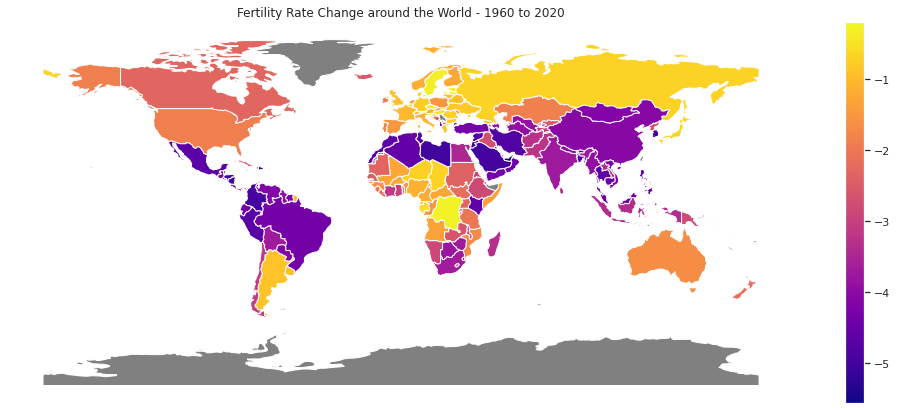

In [16]:
fig, ax_world = plt.subplots(1, figsize=(18, 7))
ax_world.set_title('Fertility Rate Change around the World - 1960 to 2020')
ax_world.axis('off')

fertility_map_1960_2020_df.plot(
    column='Fertility Change', 
    legend=True,
    ax=ax_world,
    cmap='plasma',
    missing_kwds={"color": "grey"}
)

Besides countries without data, we can see that every country decreased their fertility rates between 1960 and 2020. 

Most **European** countries shifted very little from their low fertility rates whilst developing countries across **Latin America, North Africa, Middles East and Asia** saw a dramatic reduction in fertility.

Interestingly, some **Central Afican** nations saw little drop in fertility, instead retaining a relatively high fertility rate.

### **Q6. Does Increased Female Secondary Education Decrease Fertility Rates?**

To examine this question, we will be using the **female_school_df** dataframe to get data points for each year/country combination to compare against the fertility dataframe from question 2.

In [17]:
# Remove unnecessary columns
female_school_df = female_school_df.drop('Country Code', axis=1)

# Create new rows by combining all of the years under a new 'Female Schooling' column
female_school_df = pd.melt(female_school_df, id_vars="Country Name", value_name="Female Schooling")

# All of the years have been placed in a new column 'variable' which we will rename
female_school_df.rename(columns = {'variable': 'Year'}, inplace=True)

# Combine these two dataframes on the Country Name and Year
school_fertility_df = pd.merge(fertility_melt_df, female_school_df, on=['Country Name', 'Year'])

# Remove rows for regions or income brackets so that only Countries remain
removal_list = wealth_list + region_list
sch_fert_country_df = school_fertility_df[~school_fertility_df['Country Name'].isin(removal_list)]

# Remove any countries that are missing Fertility Rate or Female School Rate
sch_fert_country_df = sch_fert_country_df.dropna(subset=['Fertility Rate', 'Female Schooling'])

# Reset the indexes to reflect new number of rows
sch_fert_country_df.reset_index(drop=True, inplace=True)

sch_fert_country_df

,Country Name,Country Code,Year,Fertility Rate,Female Schooling
0,Afghanistan,AFG,1970,7.450,2.221760
1,Argentina,ARG,1970,3.079,47.749580
2,Brunei Darussalam,BRN,1970,5.719,49.591030
3,Bhutan,BTN,1970,6.601,0.158950
4,Botswana,BWA,1970,6.645,6.813270
...,...,...,...,...,...
5891,Thailand,THA,2020,1.501,112.340736
5892,Turkmenistan,TKM,2020,2.701,92.445038
5893,Tonga,TON,2020,3.481,95.642197
5894,Tanzania,TZA,2020,4.773,32.889099


This entries in this dataframe contain only countries and not regions or other country groupings. The data contains heavy clustering at certain values so we will use **Seaborn's JointGrid plot** to see the heatmap of values with marginal plots on the axis representing the amount of clustered values.

Text(0.4, 1, 'Fertility Rate relation to Female Secondary School Participation')

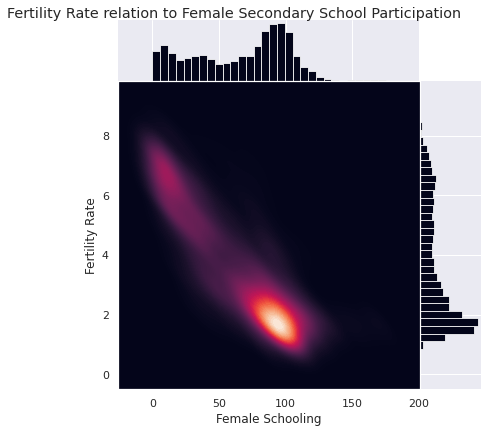

In [18]:
# Use a Seaborn JointGrid plot with a gradient of colours for Year and different shapes for Region
grid = sns.JointGrid(data=sch_fert_country_df, x="Female Schooling", y="Fertility Rate", space=0)
grid.plot_joint(
    sns.kdeplot,
    fill=True, 
    thresh=0, 
    levels=100, 
    cmap="rocket"
)
grid.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=30)
grid.fig.suptitle('Fertility Rate relation to Female Secondary School Participation', x=0.4, y=1)

What we can see here is that higher gross percentages of females participating in Secondary School, the lower the fertility rate clusters. Inversely, at low levels of education, fertility rates cluster at ahigher level.

You may notice that there a values for secondary school enrolment that are over 100% - this is because the values from this dataset represent the Gross %. Gross enrollment ratio is calculated by looking at the number of students enrolled (regardless of age) compared to the age group that is expected to be attending secondary school. A value that is high or over 100% may represent students who are repeating years or completing at an older age. (Indexmundi.com, 2019)

This data supports the claim that **"Increased Female Secondary Education Decrease Fertility Rates"** and similarly, decreased rates of Secondary education is correlated with increased fertility rates.

## **Conclusion and Recommendations**

Fertility is influenced by a wide spectrum of factors that may often be outside the control of government institutions. 

Question 1 demonstrated strong correlations between high income levels and low fertility rates (as well as the inverse). This link could be related to economic opportunities or female education rates. 

Question 6 female secondary schooling in particular and found a strong relationship between low female schooling and high fertility. Recommendations to countries looking to decrease their fertility rates would be to provide more education opportunities for females.

Questions 2 attempted to find any relationship between female labour participation and fertility however was unsuccessful in finding any strong connection. Question 3 extended this investigation to differing regions over time and similarly found no link. An possible further investigation into this data would be to separate female labour into job categories or add maternity leave length.

Question 4 and 5 demonstrates how dramatically fertility rates can shift over 60 years. The consistent underlying trend for all of the world's countries is a decrease in fertility rates between 1960 and 2020 - even in the nations with very low fertility in 1960. It is possible that at a certain level of fertility that there is a consolidation and levelling out however there is yet to be a country that demonstrates this behaviour.




## **References**
Data.worldbank.org. 2021. School enrollment, secondary, female (% gross) | Data. [online] Available at: <https://data.worldbank.org/indicator/SE.SEC.ENRR.FE> [Accessed 15 April 2022].

Data.worldbank.org. 2022. Fertility rate, total (births per woman) | Data. [online] Available at: <https://data.worldbank.org/indicator/SP.DYN.TFRT.IN> [Accessed 15 April 2022].

Data.worldbank.org. 2022. Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate) | Data. [online] Available at: <https://data.worldbank.org/indicator/SL.TLF.CACT.FE.ZS> [Accessed 15 April 2022].

Indexmundi.com. 2019. School enrollment, secondary, female (% gross) by Country. [online] Available at: <https://www.indexmundi.com/facts/indicators/SE.SEC.ENRR.FE> [Accessed 15 April 2022].

Vollset, S. E., Goren, E., Yuan, C. W., Cao, J., Smith, A. E., Hsiao, T., Bisignano, C., Azhar, G. S., Castro, E., Chalek, J., Dolgert, A. J., Frank, T., Fukutaki, K., Hay, S. I., Lozano, R., Mokdad, A. H., Nandakumar, V., Pierce, M., Pletcher, M., Robalik, T., … Murray, C. (2020). Fertility, mortality, migration, and population scenarios for 195 countries and territories from 2017 to 2100: a forecasting analysis for the Global Burden of Disease Study. Lancet (London, England), 396(10258), 1285–1306. https://doi.org/10.1016/S0140-6736(20)30677-2

https://www.imf.org/. 2020. Shrinkonomics: Lessons from Japan. [online] Available at: <https://www.imf.org/external/pubs/ft/fandd/2020/03/shrinkanomics-policy-lessons-from-japan-on-population-aging-schneider.htm> [Accessed 15 April 2022].